In [8]:
# let's try using linear regression to predict the label using the irregularity score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time


# visualize using pairplot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [10]:
# load the results
pan_tompkins_results = pd.read_csv('results/pan_tomkins_features.csv')
pan_tompkins_results = pan_tompkins_results.dropna().drop(columns=['record_name', 'second_order_rr_intervals'])
print('results shape:', pan_tompkins_results.shape)
display(pan_tompkins_results.head())


results shape: (500, 31)


,rr_mean,rr_std,rmssd,rr_kurtosis,lower_tail,upper_tail,vlf_power,lf_power,hf_power,lf_hf_ratio,...,irregularity_std,rr_coefficient,pq_interval,qrs_duration,st_interval,p_p_interval_mean,p_p_interval_std,qt_interval,total_beat_duration,label
0,0.822500,0.024071,0.822852,-0.555288,0.791389,0.863194,-0.008877,-0.034654,-0.003860,8.978540,...,0.024071,0.029265,0.145960,0.048485,0.186111,0.822778,0.036616,0.329293,0.526768,N
1,0.807828,0.026612,0.808267,-0.818772,0.772222,0.851389,0.013665,0.081028,-0.014626,-5.539863,...,0.026612,0.032943,0.125758,0.047727,0.219697,0.803056,0.041135,0.319444,0.501768,N
2,0.817424,0.027704,0.817894,-0.245645,0.783333,0.862500,0.001605,0.070813,-0.002994,-23.654986,...,0.027704,0.033892,0.133611,0.047778,0.075833,0.820062,0.045110,0.168611,0.356111,N
3,0.818611,0.019287,0.818838,-1.027679,0.786111,0.839167,-0.066794,0.112243,-0.024540,-4.573786,...,0.019287,0.023561,0.131061,0.049242,0.135859,0.814167,0.041767,0.256061,0.440909,N
4,0.807071,0.024742,0.807450,-0.737682,0.783333,0.851389,0.002343,-0.042719,0.019480,-2.192978,...,0.024742,0.030657,0.139899,0.048232,0.098232,0.810833,0.034749,0.196465,0.387879,N


In [11]:
labels = pan_tompkins_results['label'].astype(str)
# remove rows with NaN
print(labels.value_counts())

# remove nan values
pan_tompkins_results = pan_tompkins_results.dropna()

# split the data into train and test
X, y = pan_tompkins_results.drop('label', axis=1), pan_tompkins_results['label']

feature_names = X.columns
print(feature_names)

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lets print the columns
display(X_train[:5])


label
N    100
S    100
V    100
F    100
Q    100
Name: count, dtype: int64
Index(['rr_mean', 'rr_std', 'rmssd', 'rr_kurtosis', 'lower_tail', 'upper_tail',
       'vlf_power', 'lf_power', 'hf_power', 'lf_hf_ratio',
       'second_order_rr_mean', 'second_order_rr_std', 'hr_mean', 'hr_std',
       'min_hr', 'max_hr', 'pnn50', 'signal_power', 'signal_energy',
       'signal_entropy', 'irregularity_mean', 'irregularity_std',
       'rr_coefficient', 'pq_interval', 'qrs_duration', 'st_interval',
       'p_p_interval_mean', 'p_p_interval_std', 'qt_interval',
       'total_beat_duration'],
      dtype='object')


array([[ 7.25890917e-01,  5.41583255e-01,  6.90209142e-01,
         6.13417533e-01, -2.02906128e-01,  6.13645575e-01,
         1.19981142e-01,  8.08244340e-01, -9.02840124e-01,
         5.14638919e-03,  1.89887164e+00,  4.78501344e-01,
        -8.12994373e-01,  1.32725278e+00, -1.16878923e+00,
         6.91721074e-01,  5.38440281e-01,  7.79079048e-01,
         7.79079048e-01, -1.59363262e+00,  7.25890917e-01,
         5.41583255e-01,  4.53029885e-01, -3.06931542e-01,
        -3.28503803e-01, -1.04096878e-01,  5.20316723e-01,
         6.09360199e-01, -3.31835405e-02, -2.66928431e-03],
       [ 1.12975725e-01, -7.42826139e-01,  2.16346063e-03,
        -5.83033680e-01,  7.99309321e-01, -4.58838039e-01,
         6.62647088e-01, -1.72420910e+00, -6.85416674e-01,
         2.43114410e-01,  4.10888054e-02, -7.53817153e-01,
        -5.56787729e-01, -7.08068718e-01, -5.01053574e-02,
        -7.17933434e-01, -4.91144587e-01, -6.78007112e-01,
        -6.78007112e-01,  1.03118412e+00,  1.12975725e-

In [12]:
# lets do PCA and identify important features
pca = PCA()
X_pca = pca.fit_transform(X)

mask = ~((X_pca[:, 0] > 20) & (X_pca[:, 1] > 20))  # Adjust these values as needed
X_pca_filtered = X_pca[mask]
y_filtered = y[mask]

# Plot the filtered PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_filtered[:, 0], y=X_pca_filtered[:, 1], 
                hue=y_filtered, 
                palette={'N': 'green', 'O': 'orange', 'A': 'red', '~': 'gray'}, 
                alpha=0.4)
plt.show()

# get the explained variance ratio
print(pca.explained_variance_ratio_)


ValueError: The palette dictionary is missing keys: {'Q', 'V', 'F', 'S'}

<Figure size 1000x800 with 0 Axes>

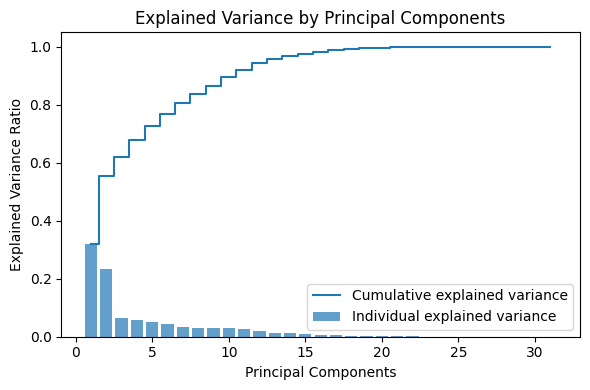

In [5]:
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np

# Assuming `X` is a DataFrame with feature names
features = pan_tompkins_results.drop(columns=['label']).columns 
components = pca.components_  # Principal component loadings

# Create a DataFrame to visualize the components and their feature contributions
loading_df = pd.DataFrame(components, columns=features, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Display the most important features for each component
most_important_features = {}
for pc in loading_df.index:
    most_important_features[pc] = loading_df.loc[pc].abs().nlargest(3).index.tolist()  # Top 3 features by absolute value

# Show the most important features overall
most_important_features = loading_df.abs().sum().sort_values(ascending=False).index.tolist()
display(most_important_features,)


['qrs_duration',
 'total_beat_duration',
 'min_hr',
 'p_p_interval_mean',
 'hr_std',
 'st_interval',
 'second_order_rr_std',
 'max_hr',
 'lower_tail',
 'qt_interval',
 'pq_interval',
 'irregularity_mean',
 'rr_mean',
 'hr_mean',
 'rr_coefficient',
 'rr_kurtosis',
 'upper_tail',
 'rr_std',
 'irregularity_std',
 'p_p_interval_std',
 'signal_entropy',
 'vlf_power',
 'pnn50',
 'signal_power',
 'signal_energy',
 'hf_power',
 'rmssd',
 'lf_power',
 'second_order_rr_mean',
 'second_order_rr_intervals',
 'lf_hf_ratio']

### We can use the results to remove less important features during training.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest model
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)

# setup train and test using PCA data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

start_time = time.time()
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target variable
y_pred_rf = rf.predict(X_test)
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the runtime
runtime_rf = time.time() - start_time
# Get the top predictor
top_predictor_rf = feature_names[np.argmax(rf.feature_importances_)]
# Append the results
result_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Accuracy': [rf.score(X_train, y_train)],
    'Test Accuracy': [accuracy_rf],
    'Runtime': [runtime_rf],
    'Top Predictor': [top_predictor_rf]
})
print(result_rf)


ValueError: Input y contains NaN.

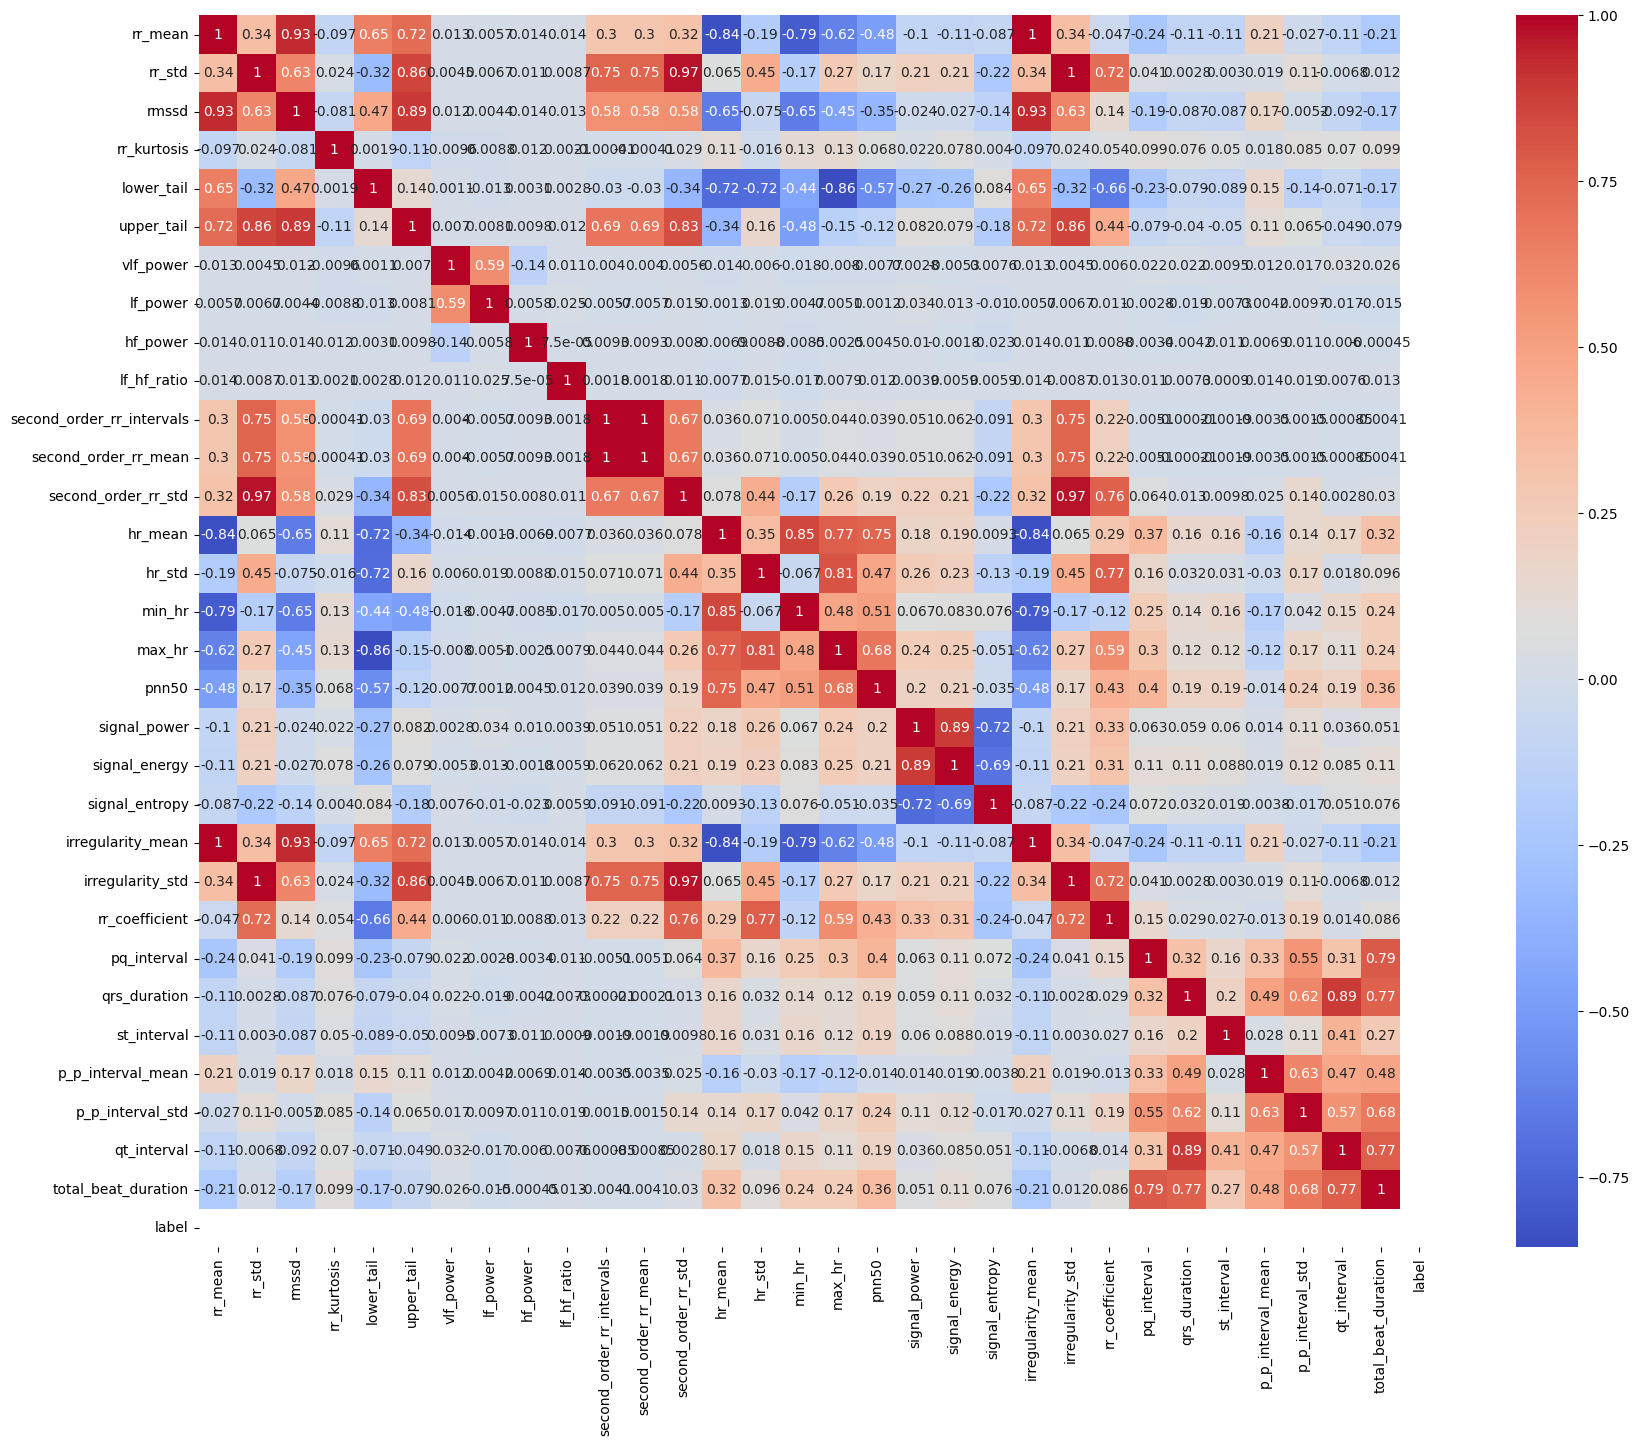

In [32]:
plt.figure(figsize=(20, 16))
sns.heatmap(pd.DataFrame(pan_tompkins_results).corr(), annot=True, cmap='coolwarm')
plt.show()

KeyError: 'nan'

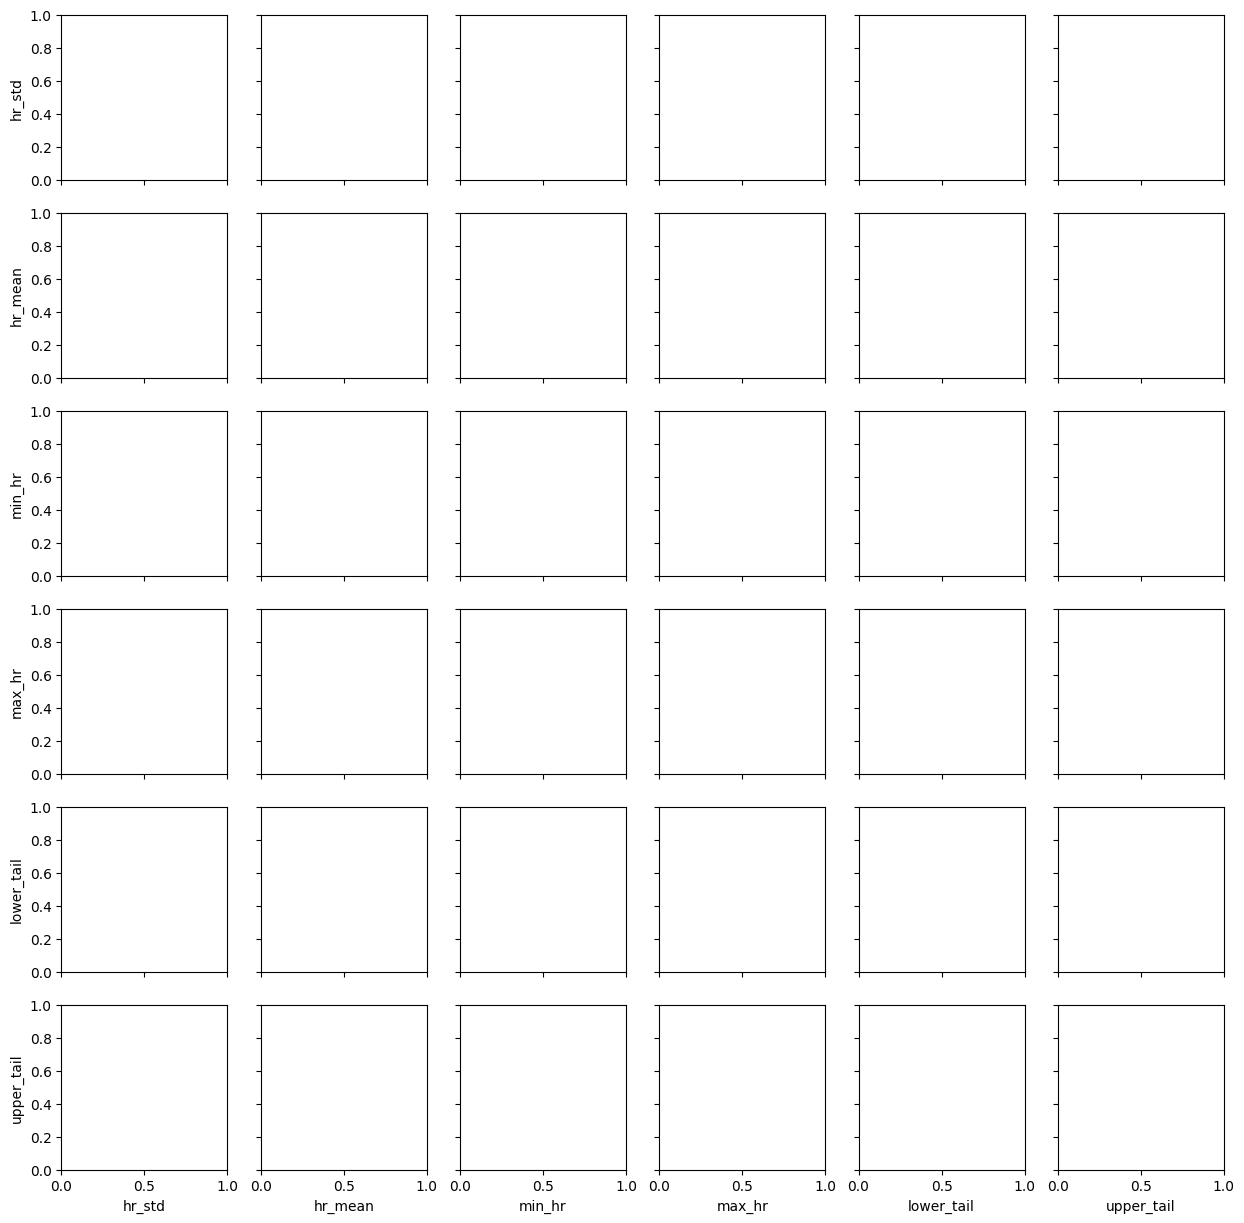

In [46]:

feature_groups = {
    'hr': ['hr_std', 'hr_mean', 'min_hr', 'max_hr', 'lower_tail', 'upper_tail', 'label'],
    'rr': ['rr_std', 'rmssd', 'pnn50', 'rr_kurtosis', 'label'],
    'signal': ['signal_power', 'signal_entropy',  'signal_energy', 'label'],
    'power': ['vlf_power', 'lf_power', 'hf_power', 'lf_hf_ratio', 'label'],
    'irregularity': ['irregularity_mean', 'irregularity_std', 'rr_coefficient', 'label'],
    'qrs': ['pq_interval', 'qrs_duration', 'st_interval', 'p_p_interval_mean', 'p_p_interval_std', 'qt_interval', 'total_beat_duration', 'label']
}

# Create and plot pairplots for each feature group
for group_name, features in feature_groups.items():
    df_subset = pan_tompkins_results[features][:500].copy()
    
    # Drop any rows with NaN values
    df_subset = df_subset.dropna()

    # Ensure label column is properly formatted
    df_subset['label'] = df_subset['label'].astype(str)    
    
    g = sns.pairplot(df_subset, 
                     hue='label', 
                     diag_kind='kde',
                     palette={'N': 'green', 'O': 'orange', 'A': 'red', '~': 'gray'},
                     plot_kws={'alpha': 0.6})
    g.fig.suptitle(f'{group_name.replace("_", " ").title()} Relationships', y=1.02)
    plt.show()
